# KNN - Vecinos mas próximos

## Nombre: Jonathan Atancuri


<p>Como caso práctico se implementará un sistema CBR básico para determinar la calidad del vino rojo. Para ello, se trabajará con el corpus Wine Quality Data Set.</p>
<p>El corpus se compone de un total de 1599 muestras de vino rojo que contienen información de pruebas fisicoquímicas realizadas en vinos rojos </p>
<p>Para ello, se deberá considerar lo siguiente:</p>
<img src="captura.png"/>
<h2>Las tareas a realizar son las siguientes:</h2>
<ul>
    <li>Preprocesar los datos del corpus de acuerdo a las sugerencias desarrolladas por wguillen</li>
    <li>Aplicar la técnicas de los vecinos más cercanos indicada en clase y empleando la fórmula propuesta por wguillen</li>
    <img src="captura2.png"/>
<h2>Máximos y Mínimos de los atributos:</h2>
fixed acidity 
min→ 4.6 
max→ 15.9
    
volatile acidity
min→ 0.12
max→ 1.58
    
citric acid
min→ 0
max→ 1
    
residual sugar
min→ 0.9
max→ 13.9
    
chlorides
min→ 0.0120.012
max→ 0.611

free sulfur dioxide
min→ 1
max→ 72
    
total sulfur dioxide
min→ 6
max→ 289

density
min→ 0.99
max→ 1
    
pH
min→ 2.74
max→ 4.01
    

sulphates
min→ 0.33
max→ 2

alcohol
min→ 8.4
max→ 14.9
    <li>Desarrollar una pequeña interfaz en Python u otro lenguaje donde se coloquen los atributos y el sistema indique la calidad del vino</li>
    <li>Realizar un pequeño informe del trabajo desarrollado, considerando los aspectos principales y qué tan preciso es el sistema.</li>

</ul>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Lectura de datos

In [19]:
dataframe = pd.read_csv(r"winequality-red.csv",sep=';')
dataframe.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [20]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,8.160185,0.526747,0.262353,2.447132,0.087056,15.839156,46.132498,0.996546,3.316882,0.655887,10.433322,5.640079
std,1.560862,0.177613,0.191117,1.179501,0.047791,10.335556,32.901447,0.001666,0.151839,0.170294,1.062201,0.805441
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995530,3.220000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.250000,2.200000,0.079000,14.000000,37.000000,0.996610,3.320000,0.620000,10.200000,6.000000
75%,9.000000,0.640000,0.410000,2.500000,0.089000,21.000000,62.000000,0.997600,3.400000,0.720000,11.100000,6.000000
max,15.900000,1.580000,1.000000,13.900000,0.611000,72.000000,289.000000,1.000000,4.010000,2.000000,14.900000,8.000000


### Preparación del modelo

In [21]:
X = dataframe[['citric acid','alcohol']].values
y = dataframe['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Entrenamiento

In [22]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.57


### Esta parte nos ayuda a apreciar los valores obtenidos como la matriz de confusión

In [23]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  0   9   3   0   0]
 [  0 127  40   3   0]
 [  0  66  76   9   0]
 [  1  12  16  13   0]
 [  0   1   2   2   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.59      0.75      0.66       170
           6       0.55      0.50      0.53       151
           7       0.48      0.31      0.38        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       380
   macro avg       0.33      0.31      0.31       380
weighted avg       0.54      0.57      0.55       380



C:\Users\jhonn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gráfica

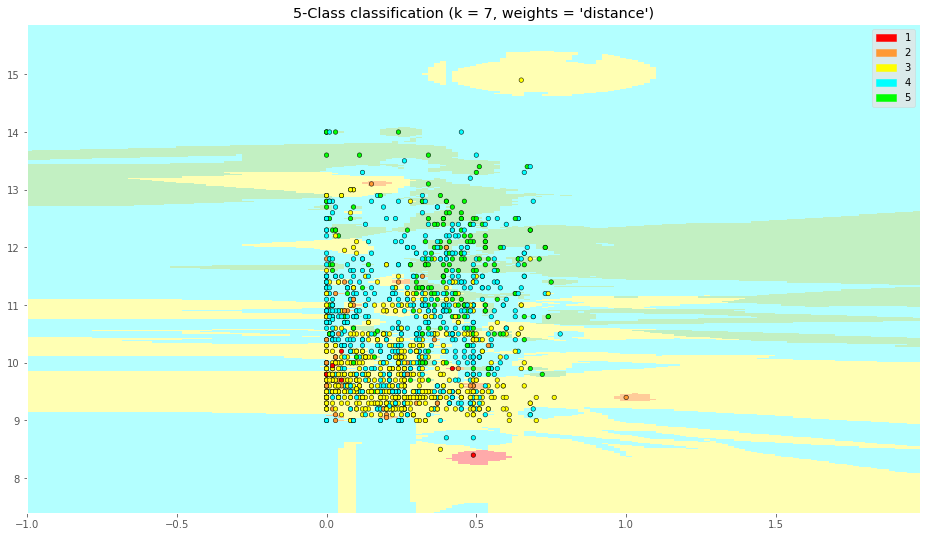

In [24]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

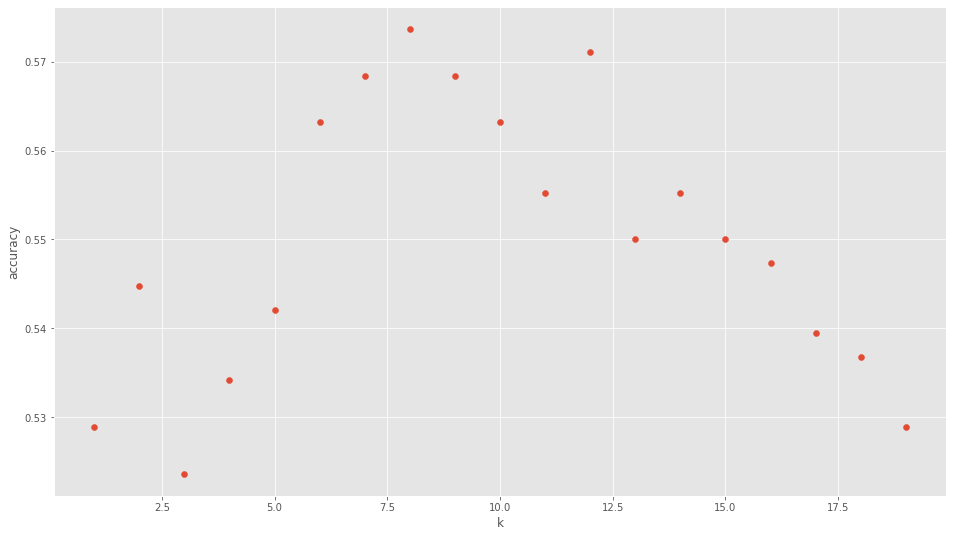

In [25]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)


### Esta parte imprime la clasificación del nuevo vino que ingresamos de acuerdo a los parámetros que enviamos en el vector.

In [26]:
print(clf.predict([[90, 15]]))

[7]


### Finalmente la implementación de una interfaz gráfica para facilitar el uso.

In [31]:
def function():
    
    cuadro_nombre.get()
    cuadro_Apellido.get()
    cuadro_Direccion.insert(0,clf.predict([[ cuadro_nombre.get(), cuadro_Apellido.get()]]))

    #print("hola mundo")
    

In [32]:
def entrenar():
    numero1=int(vecinos.get())
    n_neighbors = numero1

    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    
    cuadropre.insert(0,knn.score(X_train, y_train))
    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn.score(X_train, y_train)))
   
    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(X_test, y_test)))

In [33]:
def limpiar():
    cuadro_nombre.delete("0","end")
    cuadro_Apellido.delete("0","end")
    cuadro_Direccion.delete("0","end")
    cuadropre.delete("0","end")
    vecinos.delete("0","end")

In [34]:
from tkinter import *
raiz = Tk()
raiz.geometry("800x200")
raiz.title("Formulario Simple")
miFrame= Frame()
miFrame.pack()
bienvenido = Label(miFrame, text="BIENVENIDO")
bienvenido.grid(row=0, column=2)
bienvenido.config(font=('Arial', 16))
#-----Seccion de Nombre-----
nombre_label= Label(miFrame, text="Ingrese nivel de Ácido Cítrico:")
nombre_label.grid(row=1, column=0)
nombre_label.config(padx=10, pady=10)

pre= Label(miFrame, text="Número de vecinos a calcular:")
pre.grid(row=1, column=3)
pre.config(padx=10, pady=10)

pre= Label(miFrame, text="Presición")
pre.grid(row=3, column=2)
pre.config(padx=10, pady=10)

vecinos=Entry(miFrame)
vecinos.grid(row=2, column=3)

cuadropre=Entry(miFrame)
cuadropre.grid(row=3, column=3)

generar=Button(miFrame, text="Probar", command=entrenar)
generar.grid(row=3, column=4)


cuadro_nombre=Entry(miFrame)
cuadro_nombre.grid(row=1, column=1)
#-----Seccion de Apellido-----
apellido_label=Label(miFrame, text="Ingrese nivel de alcohol: ")
apellido_label.grid(row=2, column=0)
apellido_label.config(padx=10, pady=10)
cuadro_Apellido=Entry(miFrame)
cuadro_Apellido.grid(row=2, column=1)
#-----Seccion de Dirección-----
direccion=Label(miFrame, text="Resultado: ")
direccion.grid(row=3, column=0)
direccion.config(padx=10, pady=10)
cuadro_Direccion=Entry(miFrame)
cuadro_Direccion.grid(row=3, column=1)
mostrar=Button(miFrame, text="Mostrar", command=function)
mostrar.grid(row=4, column=1)
limpiar=Button(miFrame, text="Limpiar", command=limpiar)
limpiar.grid(row=4, column=2)
raiz.mainloop()

C:\Users\jhonn\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\jhonn\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\jhonn\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array

Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.57


<img src="captura3.png"/>
